# Upgrade an dari Template Klasifikasi2 Alias simplifikasi ( to the point)

In [1]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('c:\python39\lib\site-packages')
import cv2
import pathlib

for dirname, _, filenames in os.walk('Dataset5'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Dataset5\Jahe\Jahe (1).jpg
Dataset5\Jahe\Jahe (10).jpg
Dataset5\Jahe\Jahe (100).jpg
Dataset5\Jahe\Jahe (101).jpg
Dataset5\Jahe\Jahe (102).jpg
Dataset5\Jahe\Jahe (103).jpg
Dataset5\Jahe\Jahe (104).jpg
Dataset5\Jahe\Jahe (105).jpg
Dataset5\Jahe\Jahe (106).jpg
Dataset5\Jahe\Jahe (107).jpg
Dataset5\Jahe\Jahe (108).jpg
Dataset5\Jahe\Jahe (109).jpg
Dataset5\Jahe\Jahe (11).jpg
Dataset5\Jahe\Jahe (110).jpg
Dataset5\Jahe\Jahe (111).jpg
Dataset5\Jahe\Jahe (112).jpg
Dataset5\Jahe\Jahe (113).jpg
Dataset5\Jahe\Jahe (114).jpg
Dataset5\Jahe\Jahe (115).jpg
Dataset5\Jahe\Jahe (116).jpg
Dataset5\Jahe\Jahe (117).jpg
Dataset5\Jahe\Jahe (118).jpg
Dataset5\Jahe\Jahe (119).jpg
Dataset5\Jahe\Jahe (12).jpg
Dataset5\Jahe\Jahe (120).jpg
Dataset5\Jahe\Jahe (121).jpg
Dataset5\Jahe\Jahe (122).jpg
Dataset5\Jahe\Jahe (123).jpg
Dataset5\Jahe\Jahe (124).jpg
Dataset5\Jahe\Jahe (125).jpg
Dataset5\Jahe\Jahe (126).jpg
Dataset5\Jahe\Jahe (127).jpg
Dataset5\Jahe\Jahe (128).jpg
Dataset5\Jahe\Jahe (129).jpg
Dataset5\Jahe\Jahe 

In [2]:
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.pyplot import figure
from keras.utils import to_categorical
import seaborn as sns


In [3]:
data_dir = "Dataset5"  # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('Dataset5')

In [4]:
Jahe = list(data_dir.glob('Jahe/*'))[:25]
Kencur = list(data_dir.glob('Kencur/*'))[:25]
Kunyit = list(data_dir.glob('Kunyit/*'))[:25]
Lengkuas = list(data_dir.glob('Lengkuas/*'))[:25]
Temulawak = list(data_dir.glob('Temulawak/*'))[:25]


In [5]:
import tensorflow.keras.layers as tfl
import tensorflow as tf
path = 'Dataset5'

#INI TIDAK PERLU JUGA
#train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#rescale=1./255, validation_split=0.2)

#train_ds = train_datagen.flow_from_directory(
 #   path,
  #  subset='training',
   # target_size=(256, 256),
   # batch_size=32)
#val_ds = train_datagen.flow_from_directory(
 #   path,
  #  subset='validation',
  #  target_size=(256, 256),
   # batch_size=32)


In [6]:
train_img = {
    'Jahe':  Jahe,
    'Kencur': Kencur,
    'Kunyit': Kunyit,
    'Lengkuas': Lengkuas,
    'Temulawak': Temulawak
}
train_label = {
    'Jahe': 0,
    'Kencur': 1,
    'Kunyit': 2,
    'Lengkuas': 3,
    'Temulawak': 4
    }


In [7]:
df_images = {
    'Jahe':  Jahe,
    'Kencur': Kencur,
    'Kunyit': Kunyit,
    'Lengkuas': Lengkuas,
    'Temulawak': Temulawak
}
df_labels = {
    'Jahe': 0,
    'Kencur': 1,
    'Kunyit': 2,
    'Lengkuas': 3,
    'Temulawak': 4
}


In [8]:
#test_img

In [9]:
#train_x = train_img
#train_y = train_label

#test_x = test_img
#test_y = test_label


In [10]:
#len(train_y)

In [11]:
X, y = [], []
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (256, 256))
        X.append(resized_img)
        y.append(df_labels[label])


In [12]:
X = np.array(X)
X = X/255
y = np.array(y)


In [13]:
from sklearn.model_selection import train_test_split
#Spliting into test val train
X_train, X_test_val, Y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)


In [14]:
X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [15]:
# Define Ukuran Batch size , dan luas lebar citra

batch_size = 32
img_height = 256
img_width = 256

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1000 files belonging to 5 classes.
Using 800 files for training.
Found 1000 files belonging to 5 classes.
Using 200 files for validation.


In [17]:
# Cek 5 Kelas dataset
class_names = train_ds.class_names
print(class_names)


['Jahe', 'Kencur', 'Kunyit', 'Lengkuas', 'Temulawak']


In [18]:
# Cek ukuran gambar stelah di re scale 1./255 : : : : : : :

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  break


(32, 256, 256, 3)


32 berarti Batch size nya 256 ,256 merupakan nilai Height dan Width nya
3 adalah jumlah kanal nya

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape, Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt


In [20]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [21]:
num_classes = len(class_names)
nets = 3    
model = [0] * nets

for j in range(3):
    model[j]= Sequential()
    model[j].add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model[j].add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
    model[j].add(MaxPool2D())
    if j > 0:
        model[j].add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
        model[j].add(MaxPool2D())
    if j > 1:
        model[j].add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j > 2:
        model[j].add(Conv2D(128, kernel_size=5,
                     padding='same', activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
   # if j > 3:
    #    model[j].add(Conv2D(256, kernel_size=5,
     #                padding='same', activation='relu'))
      #  model[j].add(MaxPool2D(padding='same'))
    

    #layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.AveragePooling2D(),
    #layers.Conv2D(64, 3, padding='same', activation='relu'),
    #layers.AveragePooling2D(),
    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    #model[j].add(Dense(10, activation='softmax'))
    model[j].add(Dense(num_classes))
    model[j].compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(
                              from_logits=True),
                          metrics=['accuracy'])


In [22]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["(Conv+Max)x1", "(Conv+Max)x2", "(Conv+Max)x3"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=32, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN (Conv+Max)x1: Epochs=20, Train accuracy=0.93750, Validation accuracy=0.80000
CNN (Conv+Max)x2: Epochs=20, Train accuracy=0.25000, Validation accuracy=0.15000
CNN (Conv+Max)x3: Epochs=20, Train accuracy=0.85000, Validation accuracy=0.70000


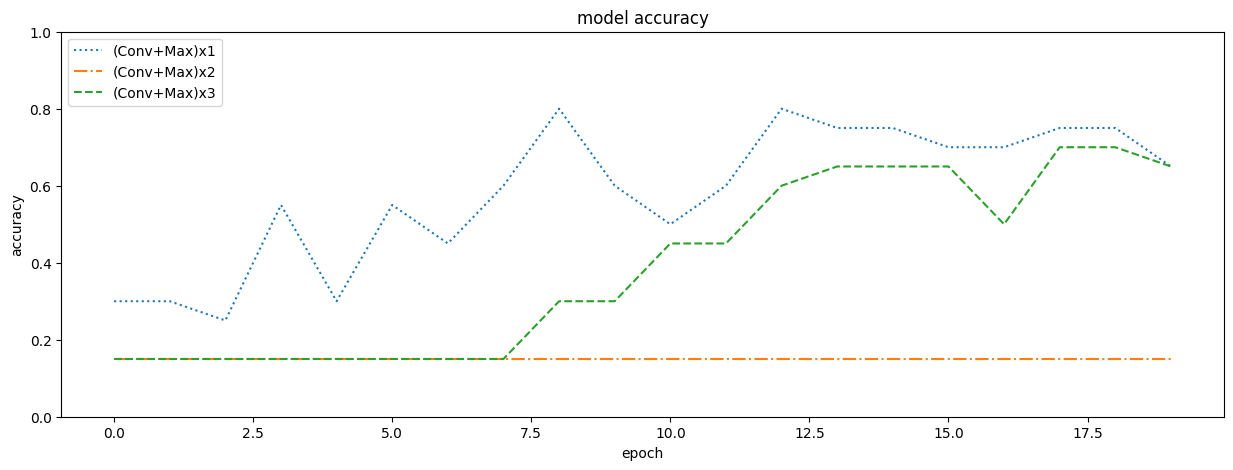

In [23]:
# PLOT ACCURACIES
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()


Bisa kita lihat dr grafik diatas. Kita dapat simpulkan jika ketiganya memiliki akurasi diatas 85 % . Namun, yang terbaik yaitu (C-P)x2 karena memiliki akurasi tertinggi dan untuk alasan efisiensi kita pilih yang x2.

Oleh karena itu , kita memilih 2 Subsampling untuk arsitektur kita sebagai jumlah subsampling yg paling efisien untuk klasifikasi rempah rimpang

In [24]:
num_classes = len(class_names)
nets = 6
model = [0] * nets

for j in range(6):
    model[j] = Sequential()
    model[j].add(layers.Rescaling(
        1./255, input_shape=(img_height, img_width, 3)))
    model[j].add(Conv2D(j*8+8, kernel_size=5, padding='same', activation='relu'))
    model[j].add(MaxPool2D())
   # model[j].add(Conv2D(j*16+16, kernel_size=5, padding='same', activation='relu'))
   # model[j].add(MaxPool2D())
    #model[j].add(Conv2D(j*32+32, kernel_size=5, padding='same', activation='relu'))
    #model[j].add(MaxPool2D(padding='same'))

    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dense(num_classes))
    model[j].compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(
                         from_logits=True),
                     metrics=['accuracy'])


In [25]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps", "16 maps", "24 maps", "32 maps", "40 maps", "48 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=32, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=20, Train accuracy=0.67500, Validation accuracy=0.55000
CNN 16 maps: Epochs=20, Train accuracy=0.73750, Validation accuracy=0.60000
CNN 24 maps: Epochs=20, Train accuracy=0.80000, Validation accuracy=0.65000
CNN 32 maps: Epochs=20, Train accuracy=0.83750, Validation accuracy=0.70000
CNN 40 maps: Epochs=20, Train accuracy=0.82500, Validation accuracy=0.70000
CNN 48 maps: Epochs=20, Train accuracy=0.96250, Validation accuracy=0.85000


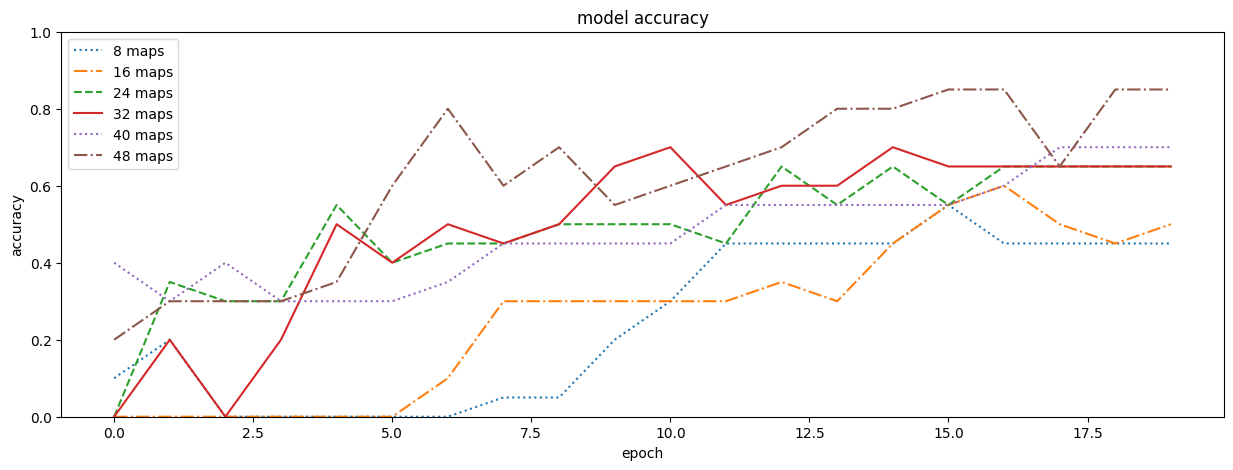

In [26]:
# PLOT ACCURACIES
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()


dilihat dari grafik diatas, maka dpt disimpulkan bahwa 64 feature map lah yang tertinggi namun pada epoch 17,5 bernilai sama dengan feature map 32. oleh karena itu, untuk alasan efisiensi, yang digunakan dalam arsitektur cnn kita adalah 32 feature map.  karena fm32 mendapat nilai yang cukup tinggi senilai 0.8825 pada epoch 20 hampir sama dengan fm48 yang bernilai sama dan fm64 yang memiliki selisih 0.03.

In [27]:
num_classes = len(class_names)
nets = 8
model = [0] * nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(layers.Rescaling(
        1./255, input_shape=(img_height, img_width, 3)))
    model[j].add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    #model[j].add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
   # model[j].add(MaxPool2D())
   # model[j].add(Dropout(j*0.1))
    #model[j].add(Conv2D(j*32+32, kernel_size=5, padding='same', activation='relu'))
    #model[j].add(MaxPool2D(padding='same'))

    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(num_classes))
    model[j].compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(
                         from_logits=True),
                     metrics=['accuracy'])

In [28]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=32, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=20, Train accuracy=0.92500, Validation accuracy=0.70000
CNN D=0.1: Epochs=20, Train accuracy=0.81250, Validation accuracy=0.70000
CNN D=0.2: Epochs=20, Train accuracy=0.68750, Validation accuracy=0.60000
CNN D=0.3: Epochs=20, Train accuracy=0.77500, Validation accuracy=0.60000
CNN D=0.4: Epochs=20, Train accuracy=0.73750, Validation accuracy=0.60000
CNN D=0.5: Epochs=20, Train accuracy=0.66250, Validation accuracy=0.60000
CNN D=0.6: Epochs=20, Train accuracy=0.63750, Validation accuracy=0.50000
CNN D=0.7: Epochs=20, Train accuracy=0.55000, Validation accuracy=0.40000


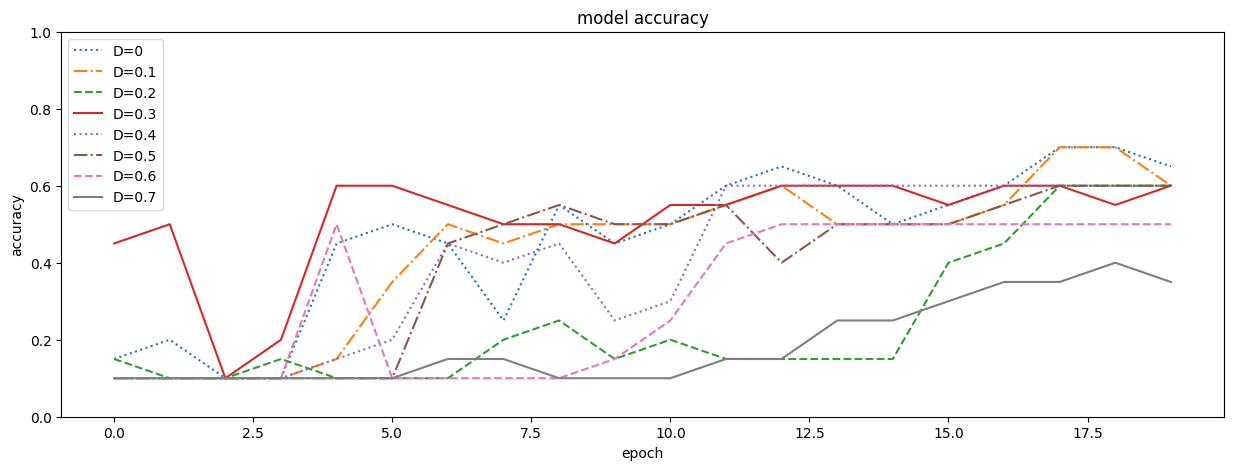

In [29]:
# PLOT ACCURACIES
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.show()


Summary from thats graphs is Dropout with x0% was the most eficients because from epoch 1 to 15 had significant higher eficients from others rate . althougt from dropout 20% lacking a bit when epoch above 20. but overall Dropout with 30% was the winner of this experiment.

Kesimpulan akhir

Training CNN memiliki keragaman parameter dan nilai biasnya pada masing-masing layer sehingga bisa diartikan jika CNN merupakan proses yang acak. Acak dari segi nilai hyperparameter ataupun nilai keluaran setiap arsitekturnya selalu berbeda. Inilah yang membuat eksperimen seperti ini susah untuk dilakukan karena setiap kita meng run arsitektur kita dengan parameter yang sama seperti sebelumnya, hasilnya bisa saja beda setiap waktunya. Olehkarena itu, kita harus selalu mencoba puluhan bahkan sampai ratusan eksperimen untuk menarik sebuah rata-rata dari setiap training model.  ketiga eksperimen pun sudah saya run 1 bulanan dengan nilai epoch , batch size, subsampling, optimizers, dan feature map yang berbeda beda dengan layer arsitektur yang berbeda beda pula sehingga bisa saya simpulkan penelitian ini sudah menarik nilai rata-rata dari setiap modelnya. Untuk arsitektur yang paling optimal sendiri sesuai dengan apa yang ketiga eksperimen saya sudah lakukan sebelumnya untuk mengklasifikasi rempah rimpang dengan menggunakan convolutional neural network adalah dengan kombinasi 2 subsampling dengan dua layer konvolusi dengan feature map bernilai 32 dan 64 di kedua subsampling dan nilai dropout sebesar 30%. Dengan begitu jika kita rakit ulang menjadi sbuah arsitektur CNN, maka model tersebut akan mendapat nilai akurasi sebesar 97%.